# Lectura, análisis y filtrado de eventos Forbush (FE)
### Base de datos: http://spaceweather.izmiran.ru/eng/fds2014.html

In [1]:
import pandas as pd
import matplotlib
print(matplotlib.__version__)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from augerscalerpy.scaler_cleaning import scaler_clean, plot_data
from augerscalerpy.plot_config import configure_plots
from IPython.display import Image

3.7.0


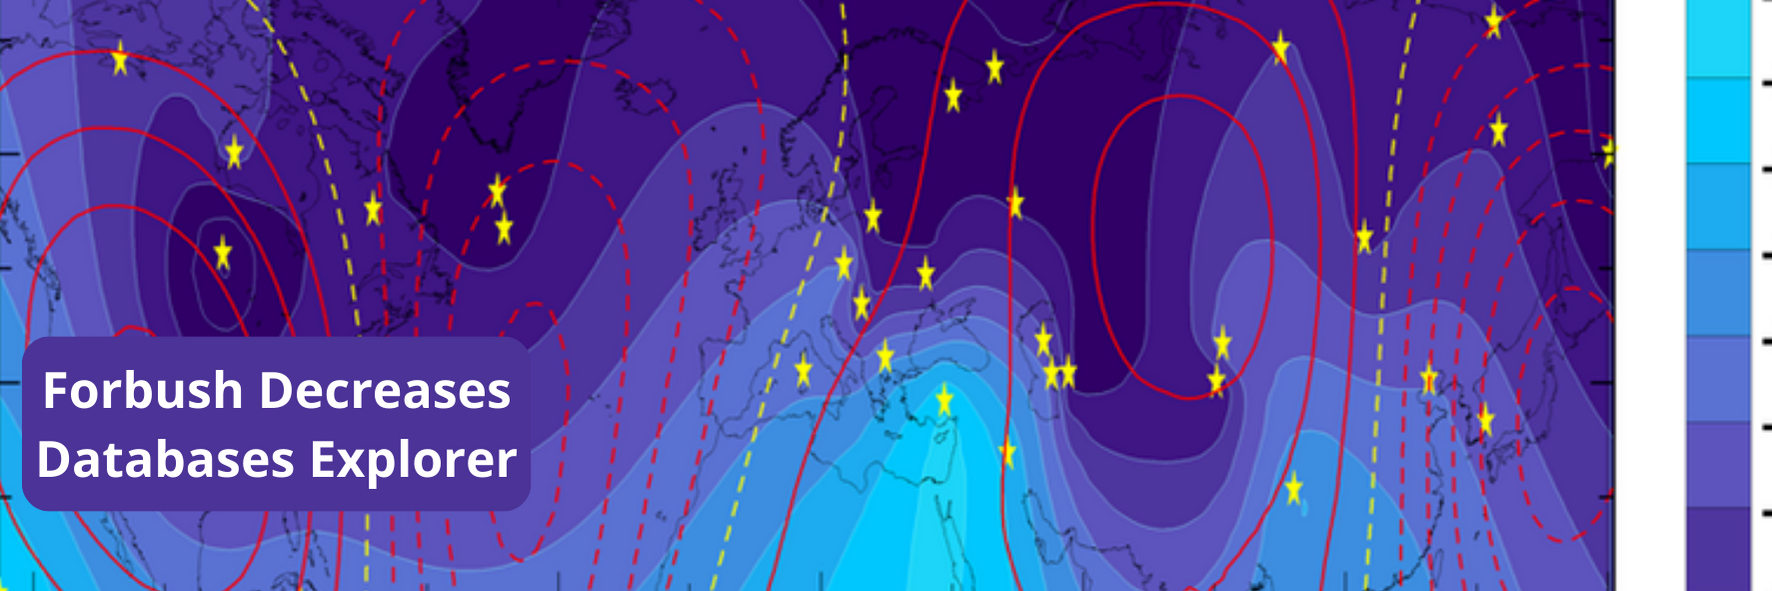

In [39]:
ruta_imagen_local = '/home/jennifer/Documentos/msc_tesis/P3.png'

Image(filename=ruta_imagen_local)

### Leyendo el archivo que ya está guardado

In [2]:
data = pd.read_csv('forbush_events/forbush_decrease_ALL_years.csv')
data['MagnM'] = data['MagnM'].apply(lambda x: x if x >= 0 else 0)
data

date  MagnM  Axym  Azrange  TminM  DminM  OType   Bmax  \
0    1957.07.05 00:42:00    3.8  1.69     3.87     10  -0.81      1 -999.0   
1    1957.07.06 20:00:00    1.6  1.84     3.92     -2  -0.66      9 -999.0   
2    1957.07.09 06:00:00    1.4  1.88     4.22      1  -1.07      9 -999.0   
3    1957.07.11 10:00:00    1.5  1.77     3.45      9  -1.07      9 -999.0   
4    1957.07.13 19:00:00    1.2  2.63     3.80      8  -0.70      9 -999.0   
..                   ...    ...   ...      ...    ...    ...    ...    ...   
104  2020.12.19 09:00:00    0.5  1.05     0.87     11  -0.21      9    9.0   
105  2020.12.20 23:00:00    0.6  0.86     0.92     19  -0.18      9   11.6   
106  2020.12.22 01:00:00    0.6  0.82     0.72      6  -0.20      9   12.9   
107  2020.12.27 04:00:00    0.5  0.59     0.52     42  -0.21      9    7.2   
108  2020.12.29 18:00:00    0.6  0.98     0.71     16  -0.19      9    6.8   

     Bzmin   Vmax  Dstmin  
0    999.0 -999.0   -92.0  
1    999.0 -999.0   -45.0  
2    999.0 -999.0   -12.0  
3    999.0 -999.0   -12.0  
4    999.0 -999.0    -2.0  
..     ...    ...     ...  
104   -3.3  388.0   -12.0  
105   -6.5  407.0   -13.0  
106   -2.4  637.0   -22.0  
107   -3.0  552.0   -14.0  
108   -3.4  509.0   -15.0  

[7939 rows x 11 columns]

/tmp/ipykernel_47696/3176254873.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = pd.to_datetime(filtered_data['date'], format='%Y.%m.%d %H:%M:%S')
/tmp/ipykernel_47696/3176254873.py:31: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(date_values, MagnM_values, c=color_values, cmap=cmap, s=20, alpha=0.8)


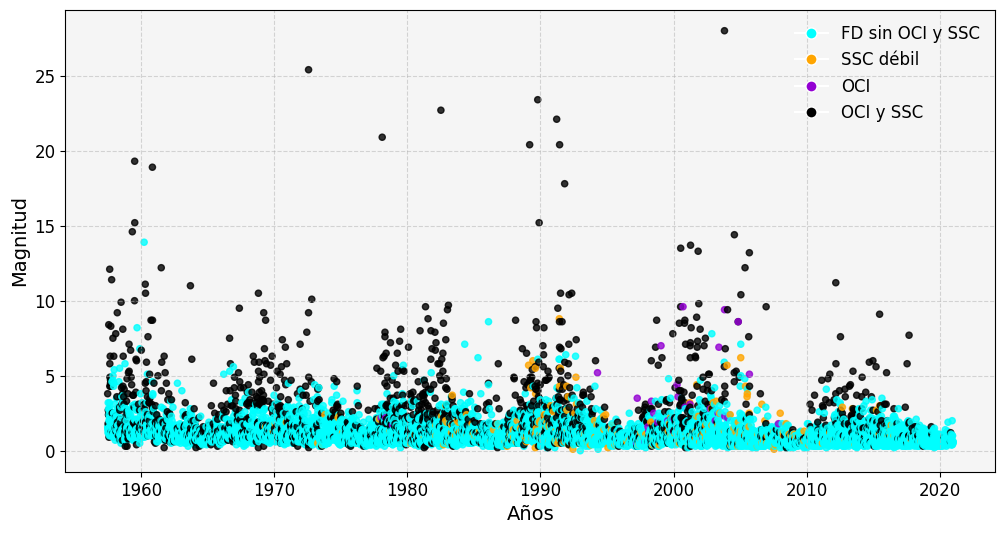

In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

# Configurar tamaños de fuente globalmente
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Filtrar el DataFrame para obtener solo los valores de OType 1, 3 y 9
filtered_data = data[data['OType'].isin([1, 2, 3, 9])]
filtered_data['date'] = pd.to_datetime(filtered_data['date'], format='%Y.%m.%d %H:%M:%S')

date_values = filtered_data['date'].values
date_values = pd.to_datetime(date_values)

years = date_values.year

# Extraer los valores de date, MagnM y OType
date_values = filtered_data['date']
MagnM_values = filtered_data['MagnM']
OType_values = filtered_data['OType']

plt.figure(figsize=(12, 6))
colors = {9: 'cyan', 3: 'orange', 2: 'darkviolet', 1: 'black'}
color_values = [colors[otype] for otype in OType_values]

cmap = mcolors.ListedColormap(['cyan', 'orange', 'darkviolet', 'black'])
scatter = plt.scatter(date_values, MagnM_values, c=color_values, cmap=cmap, s=20, alpha=0.8)
plt.xlabel('Años')
plt.ylabel('Magnitud')
plt.title('')

# Reemplazar los nombres de las leyendas
legend_labels = {'1': 'OCI y SSC', '2': 'OCI', '3': 'SSC débil', '9': 'FD sin OCI y SSC'}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[str(otype)],
                              markersize=8, markerfacecolor=color) for otype, color in colors.items()]

# Agregar leyenda con los nuevos nombres
plt.legend(handles=legend_handles, loc='best', frameon=False, fontsize=12)

# Añadir una grilla estética
plt.grid(True, linestyle='--', alpha=0.5)

# Configurar fondo de la imagen
plt.gca().set_facecolor('#f5f5f5')

#plt.savefig('forbush_events.png')
#plt.savefig('forbush_events.pdf')

# Mostrar el gráfico
plt.show()


### Reproducción de Gráfica del IZMIRAN

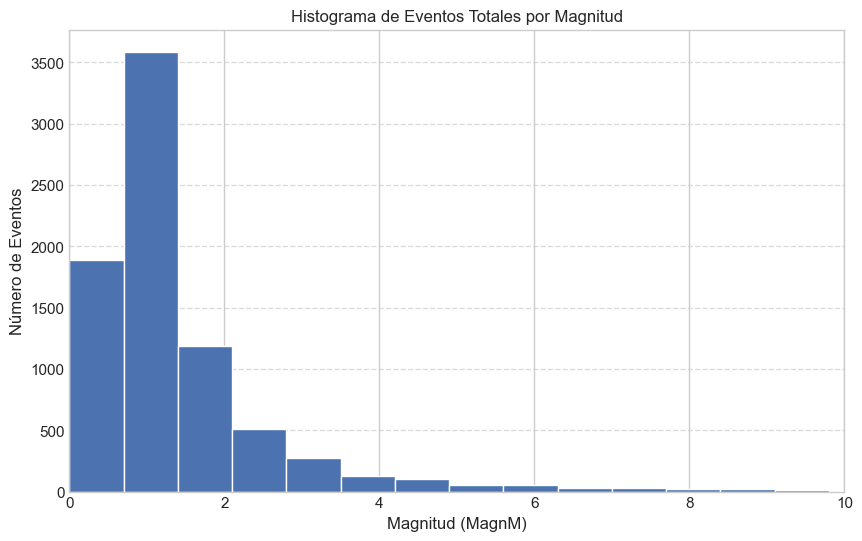

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar el DataFrame para obtener solo los valores de OType 1, 2, 3 y 9
filtered_data = data[data['OType'].isin([1, 2, 3, 9])]

# Crear una figura con un tamaño adecuado
plt.figure(figsize=(10, 6))

# Crear un histograma de eventos en función de la magnitud con bines de ancho 0.5
#plt.hist(filtered_data['MagnM'], bins=30, rwidth=0.8, alpha=0.7, color='b', align='left')
plt.hist(filtered_data['MagnM'], bins=40)

# Configurar etiquetas y título
plt.xlabel('Magnitud (MagnM)')
plt.ylabel('Número de Eventos')
plt.title('Distribución total de Eventos Forbush en en el periodo 2006-2018')

# Definir límites para los bines de magnitud
plt.xlim(0, 10)

# Agregar una cuadrícula de fondo para mejorar la estética
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el histograma
plt.show()


/tmp/ipykernel_47696/2577403986.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


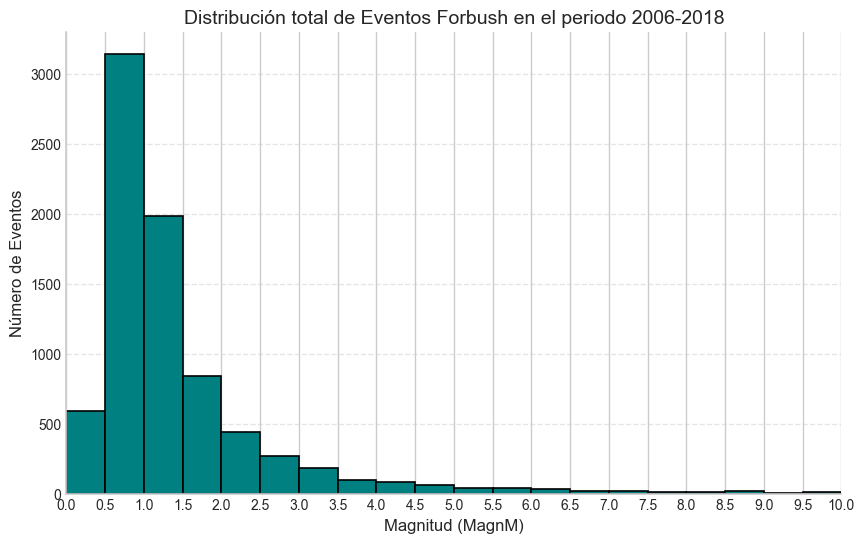

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar el DataFrame para obtener solo los valores de OType 1, 2, 3 y 9
filtered_data = data[data['OType'].isin([1, 2, 3, 9])]

# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

# Crear una figura con un tamaño adecuado y un fondo claro
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-whitegrid')

# Definir los bines de 0 a 10 con incrementos de 0.5
bins = [i * 0.5 for i in range(21)]

# Crear un histograma de eventos en función de la magnitud con bines definidos
plt.hist(filtered_data['MagnM'], bins=bins, color='teal', edgecolor='black', linewidth=1.2)

# Configurar etiquetas y título con una fuente más grande
plt.xlabel('Magnitud (MagnM)', fontsize=12)
plt.ylabel('Número de Eventos', fontsize=12)
plt.title('Distribución total de Eventos Forbush en el periodo 2006-2018', fontsize=14)

# Definir límites para los bines de magnitud
plt.xlim(0, 10)

# Agregar una cuadrícula de fondo para mejorar la estética
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Añadir detalles visuales como un borde más oscuro alrededor del gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(1.2)
plt.gca().spines['left'].set_linewidth(1.2)

# Añadir etiquetas a los bines del histograma
plt.xticks(bins, fontsize=10)
plt.yticks(fontsize=10)

# Mostrar el histograma
plt.show()


### Eventos Forbush seleccionados para el análisis con los datos del Observatorio Pierre Auger

# COMPARACIÓN CRI AUGER VS FORBUSH TIPO 1 VALIDADOS
#### Qs= 4 y 5

In [19]:
# NORMALIZANDO CON MIN-MAX
# Calcular el valor mínimo y máximo de la columna

def minmax(df,col1,col2):
    df.set_index(col2, inplace=True)
    min_val = df[col1].min()
    max_val = df[col1].max()
    #Aplicar la normalización min-max
    df[col1] = (df[col1] - min_val) / (max_val - min_val)
    if df.isnull().values.any():
        print("Hay valores NaN en el DataFrame después de normalizar, llenaremos con la media.")
        df.fillna(df.mean(), inplace=True)
        if df.isnull().values.any():
            print("Aún hay valores NaN en el DataFrame después del llenado.")
        else:
            print("Listo!")
    else:
        print("No hay valores NaN en el DataFrame después del proceso.")
    df.reset_index(inplace=True)
    return df

In [20]:
forbush_auger = pd.read_csv('forbush_events/FD_type1_PIERRE_AUGER_2006-2021.csv')
forbush_auger = forbush_auger[['date', 'MagnM','Otype','Qs']]

In [21]:
forbush_auger

date  MagnM  Otype   Qs
0    2006-07-09 21:36:00    3.8      1  4.0
1    2006-07-27 13:53:00    1.0      1  4.0
2    2006-08-07 00:35:00    0.9      1  4.0
3    2006-12-08 04:35:00    1.8      1  4.0
4    2006-12-14 14:14:00    9.6      1  5.0
..                   ...    ...    ...  ...
143  2017-11-27 14:42:00    1.0      1  4.0
144  2017-12-04 16:13:00    1.5      1  4.0
145  2018-01-08 06:48:00    1.2      1  4.0
146  2018-02-15 08:35:00    1.6      1  4.0
147  2018-03-09 18:06:00    0.9      1  4.0

[148 rows x 4 columns]

In [22]:
auger = pd.read_csv('scaler_datasets/auger_cleaned_300s_NORMALIZADO.csv', index_col='date', parse_dates=True)
auger_hourly = auger.resample('D').mean()

In [23]:
auger_hourly.reset_index(inplace=True)

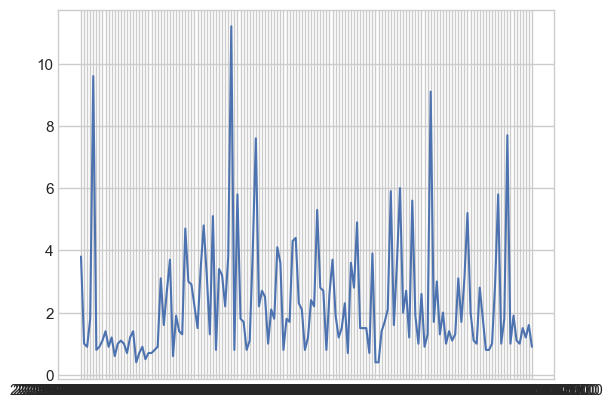

In [24]:
FA = forbush_auger.copy()
plt.plot(forbush_auger['date'],forbush_auger['MagnM'])

In [25]:
FD_auger = minmax(FA,'MagnM','date')

No hay valores NaN en el DataFrame después del proceso.


In [26]:
FD_auger['date'] = pd.to_datetime(FD_auger['date'])
auger_hourly['date'] = pd.to_datetime(auger_hourly['date'])


FD_auger['MagnM'] = pd.to_numeric(FD_auger['MagnM'])
auger_hourly['counts/s'] = pd.to_numeric(auger_hourly['counts/s'])

In [27]:
############ EXTRAEMOS LOS VALORES A ARREGLOS DE NUMPY
date_auger_FD = FD_auger['date'].values
FD = FD_auger['MagnM'].values

date_auger_CRI = auger_hourly['date'].values
scaler = auger_hourly['counts/s'].values

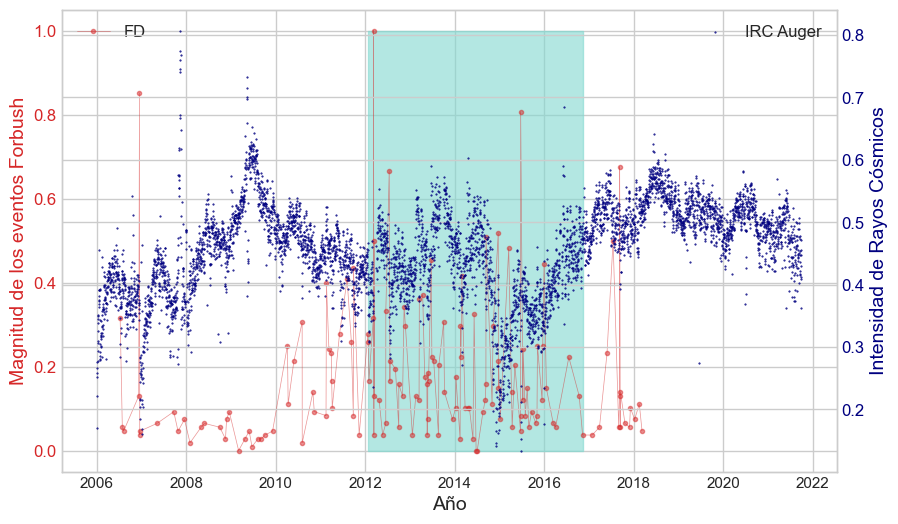

In [28]:
import matplotlib.pyplot as plt

# Crear una figura
fig, ax1 = plt.subplots(figsize=(10, 6))

# Configurar el primer eje Y (izquierdo)
color = 'tab:red'
ax1.set_xlabel('Año', fontsize=14)  # Aumentar el tamaño de la fuente
ax1.set_ylabel('Magnitud de los eventos Forbush', color=color, fontsize=14)  # Aumentar el tamaño de la fuente
ax1.plot(date_auger_FD, FD, color=color, marker='.', label='FD', linewidth=0.5, alpha=0.5)
ax1.tick_params(axis='y', labelcolor=color, labelsize=12)  # Aumentar el tamaño de la fuente
# Crear un segundo eje Y (derecho)
ax2 = ax1.twinx()

# Configurar el segundo eje Y (derecho)
color = 'navy'
ax2.set_ylabel('Intensidad de Rayos Cósmicos', color=color, fontsize=14)  # Aumentar el tamaño de la fuente
ax2.scatter(date_auger_CRI, scaler, color=color, marker='.', label='IRC Auger', s=1)
ax2.tick_params(axis='y', labelcolor=color, labelsize=12)  # Aumentar el tamaño de la fuente

# Sombreado de la zona 2012 a 2016
# Convertir los valores de la condición a objetos de tipo datetime
start_date = pd.to_datetime('2012-01-01')
end_date = pd.to_datetime('2016-12-31')
# Crear la condición utilizando los objetos de tipo datetime
condition = ((date_auger_FD >= start_date) & (date_auger_FD <= end_date))

# Utilizar la condición actualizada en la función fill_between()
ax1.fill_between(date_auger_FD, FD.min(), FD.max(), where=condition, color='#81d8d0', alpha=0.6)

# Configurar etiquetas y título
plt.title('', fontsize=16)  # Aumentar el tamaño de la fuente

# Agregar leyendas
ax1.legend(loc='upper left', frameon=False, fontsize=12)  # Aumentar el tamaño de la fuente
ax2.legend(loc='upper right', frameon=False, fontsize=12)  # Aumentar el tamaño de la fuente

#plt. savefig('CRI_FD_compar.png')
plt. savefig('CRI_FD_compar.pdf')
# Mostrar el gráfico
plt.show()


/tmp/ipykernel_47696/1160275692.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


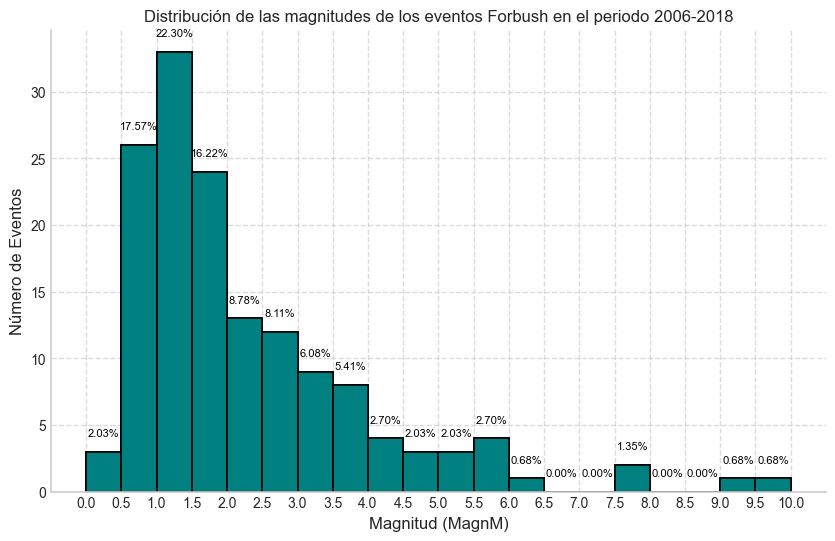

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

# Crear una figura con un tamaño adecuado y un fondo claro
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-whitegrid')

# Definir los bines de 0 a 10 con incrementos de 0.5
#bins = [i * 0.5 for i in range(21)]
bins = [i * 0.5 for i in range(21)]


# Crear el histograma con colores agradables y bordes definidos
plt.hist(forbush_auger['MagnM'], bins=bins, color='teal', edgecolor='black', linewidth=1.2)

# Calcular los porcentajes y agregarlos encima de cada barra
total_eventos = len(forbush_auger['MagnM'])
for bin, count in zip(bins, plt.hist(forbush_auger['MagnM'], bins=bins, color='teal', edgecolor='black', linewidth=1.2)[0]):
    porcentaje = count / total_eventos * 100
    plt.text(bin + 0.25, count + 1, f'{porcentaje:.2f}%', ha='center', va='bottom', fontsize=8, color='black')

# Configurar etiquetas y título con una fuente más grande
plt.xlabel('Magnitud (MagnM)', fontsize=12)
plt.ylabel('Número de Eventos', fontsize=12)
plt.title('Distribución de Eventos Forbush en Pierre Auger en el periodo 2006-2018')

# Añadir una cuadrícula de fondo más ligera para mejorar la estética
plt.grid(linestyle='--', alpha=0.7)

# Añadir detalles visuales como un borde más oscuro alrededor del gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(1.2)
plt.gca().spines['left'].set_linewidth(1.2)

# Añadir etiquetas a los bines del histograma
plt.xticks(bins, fontsize=10)
plt.yticks(fontsize=10)

#plt. savefig('CRI_FD_HISTOGRAMA.pdf')
#plt. savefig('CRI_FD_HISTOGRAMA.png')

# Mostrar el histograma
plt.show()


